In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import SGDClassifier, LogisticRegression
# from sklearn.metrics import plot_roc_curve, recall_score, precision_score, roc_curve, roc_auc_score, balanced_accuracy_score
# import matplotlib.pyplot as plt
# import matplotlib as mpl

In [53]:
df = pd.read_csv("data/all_data.csv")

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5856\3684764311.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/all_data.csv")


(38079, 151)


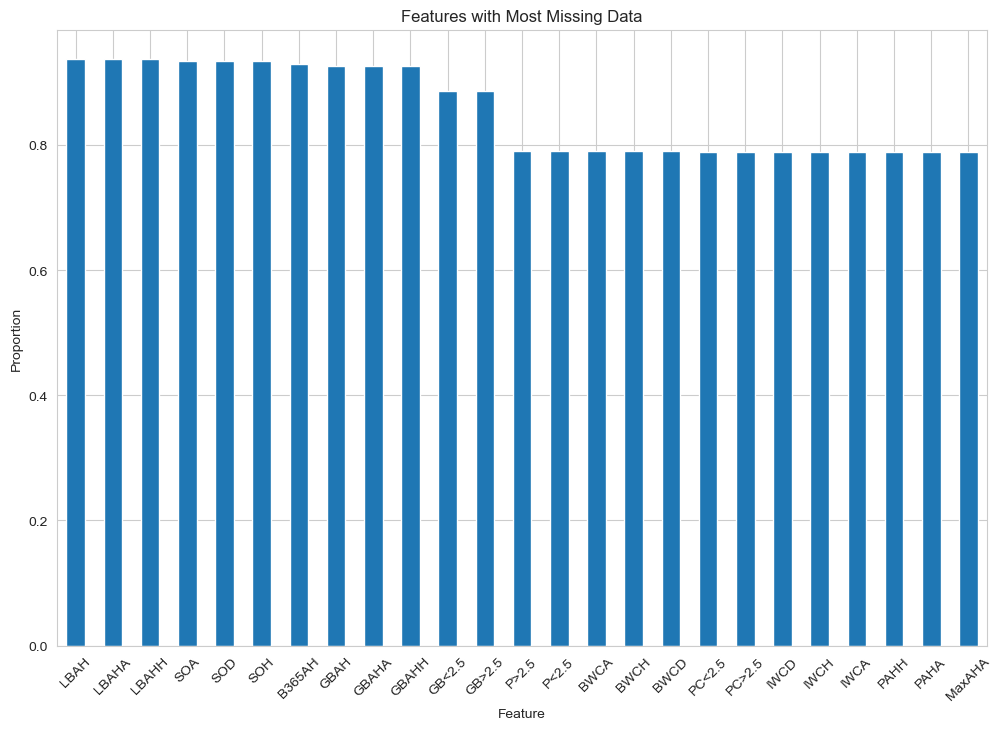

In [54]:
# remove unknown columns
columns = df.columns
unknown_cols = [c for c in columns if "Unnamed" in c]
df = df.drop(columns=unknown_cols)

# remove rows with only na values
df = df.dropna(how="all")
print(df.shape)

sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
missing_vals = df.isna().sum()/df.shape[0]
missing_vals = missing_vals.sort_values(ascending=False)[:25]
ax = missing_vals.plot(kind='bar')

ax.set_title('Features with Most Missing Data')
ax.set_ylabel('Proportion')
ax.set_xlabel('Feature')
ax.tick_params(axis='x', rotation=45)

plt.savefig("missing_features_original.pdf")

features_to_keep = ["Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR", "HS", "AS", "HST", "AST", 
                    "B365H", "B365D", "B365A",
                    "IWH", "IWD", "IWA",
                    "WHH", "WHD", "WHA"]
df = df[features_to_keep]

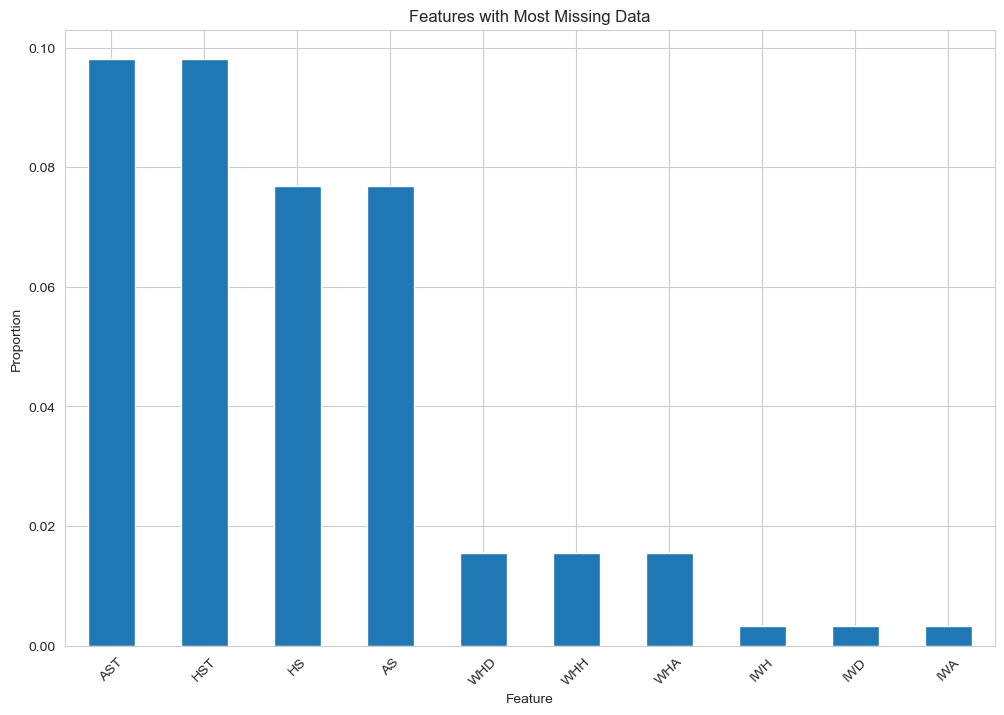

In [55]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
missing_vals = df.isna().sum()/df.shape[0]
missing_vals = missing_vals.sort_values(ascending=False)[:10]
ax = missing_vals.plot(kind='bar')

ax.set_title('Features with Most Missing Data')
ax.set_ylabel('Proportion')
ax.set_xlabel('Feature')
ax.tick_params(axis='x', rotation=45)

plt.savefig("missing_features.pdf")

In [56]:
df.loc[(df['HomeTeam'] == "Arsenal") | (df['AwayTeam'] == "Arsenal")]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,B365H,B365D,B365A,IWH,IWD,IWA,WHH,WHD,WHA
53,2002-08-18,Arsenal,Birmingham,2.0,0.0,H,15.0,7.0,7.0,1.0,1.222,5.000,10.000,1.25,4.50,9.00,1.22,5.00,9.50
83,2002-08-24,West Ham,Arsenal,2.0,2.0,D,8.0,9.0,4.0,5.0,4.000,3.500,1.727,4.20,3.20,1.70,4.33,3.20,1.72
87,2002-08-27,Arsenal,West Brom,5.0,2.0,H,10.0,8.0,8.0,6.0,1.170,5.500,13.000,1.20,5.00,10.00,1.16,5.50,12.00
113,2002-09-01,Chelsea,Arsenal,1.0,1.0,D,8.0,8.0,2.0,5.0,3.000,3.000,2.250,2.70,3.00,2.30,2.87,3.00,2.25
125,2002-09-10,Arsenal,Man City,2.0,1.0,H,13.0,5.0,5.0,4.0,1.333,4.333,7.500,1.30,4.20,8.00,1.30,4.33,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37898,2023-12-05,Luton,Arsenal,3.0,4.0,A,6.0,23.0,4.0,9.0,17.000,7.000,1.180,15.00,6.75,1.20,15.00,6.50,1.17
37915,2023-12-09,Aston Villa,Arsenal,1.0,0.0,H,10.0,12.0,3.0,5.0,3.300,3.600,2.100,3.25,3.60,2.15,3.20,3.75,2.00
37982,2023-12-17,Arsenal,Brighton,2.0,0.0,H,26.0,6.0,9.0,1.0,1.440,5.000,6.000,1.50,4.70,6.00,1.44,4.60,6.00
38044,2023-12-23,Liverpool,Arsenal,1.0,1.0,D,13.0,13.0,3.0,2.0,2.380,3.600,2.800,2.45,3.60,2.75,2.30,3.60,2.75


In [57]:
df.dtypes

Date         object
HomeTeam     object
AwayTeam     object
FTHG        float64
FTAG        float64
FTR          object
HS          float64
AS          float64
HST         float64
AST         float64
B365H       float64
B365D       float64
B365A       float64
IWH         float64
IWD         float64
IWA         float64
WHH         float64
WHD         float64
WHA         float64
dtype: object

D:\Anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


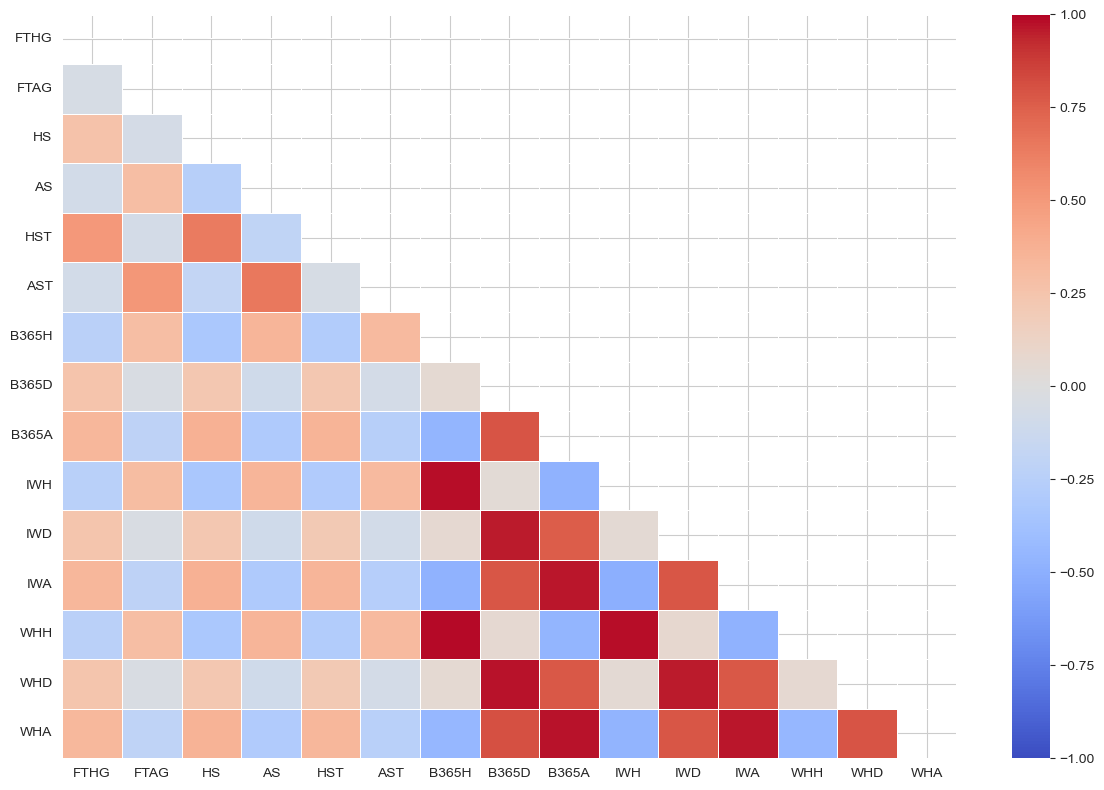

In [60]:
import seaborn as sns
# corr = df.corr()
numeric_cols = df.select_dtypes(exclude='object').columns
corr = df[numeric_cols].corr()
matrix = np.triu(corr)
plt.figure(figsize=(12,8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidths=.5,
            cmap="coolwarm",
            mask=matrix,
            vmin=-1.0,
            vmax=1.0,
            annot=True,
            fmt='.2f')
plt.tight_layout()
plt.savefig("corr.pdf")

[0.4562619816696867, 0.25880406523280547, 0.2849339530975078]


D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


,FTHG,FTAG,HS,AS,HST,AST,B365H,B365D,B365A,IWH,IWD,IWA,WHH,WHD,WHA
count,38079.000000,38079.000000,35150.000000,35150.000000,34344.000000,34344.000000,38022.000000,38022.00000,38022.000000,37951.000000,37951.000000,37951.000000,37491.000000,37491.000000,37491.000000
mean,1.526169,1.155808,13.725690,11.045121,5.243507,4.164366,2.603548,3.80082,4.549434,2.504941,3.656752,4.174578,2.575885,3.664818,4.444521
std,1.284983,1.131403,5.154494,4.575926,2.832524,2.467900,1.744933,1.16537,3.593942,1.499812,0.958590,2.950609,1.704453,1.037789,3.573793
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.020000,1.40000,1.070000,1.030000,1.500000,1.100000,1.020000,1.020000,1.080000
25%,1.000000,0.000000,10.000000,8.000000,3.000000,2.000000,1.670000,3.25000,2.500000,1.700000,3.150000,2.500000,1.670000,3.100000,2.500000
50%,1.000000,1.000000,13.000000,11.000000,5.000000,4.000000,2.100000,3.40000,3.500000,2.100000,3.350000,3.300000,2.100000,3.300000,3.400000
75%,2.000000,2.000000,17.000000,14.000000,7.000000,6.000000,2.750000,3.80000,5.000000,2.700000,3.800000,4.700000,2.750000,3.750000,5.000000
max,10.000000,9.000000,46.000000,39.000000,24.000000,20.000000,26.000000,21.00000,51.000000,20.000000,16.000000,42.000000,26.000000,19.000000,51.000000


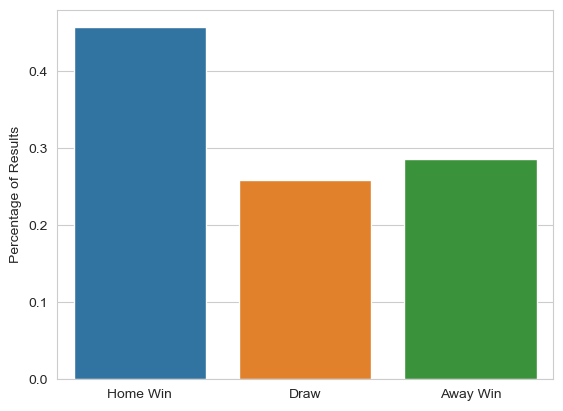

In [20]:
total_games = df["FTR"].count()
result_percentage = df["FTR"].value_counts() / total_games
keys = ["H", "D", "A"]
vals = list(result_percentage[k] for k in keys)
print(vals)
ax = sns.barplot(x=["Home Win", "Draw", "Away Win"], y=vals)
ax.set(ylabel='Percentage of Results')
plt.savefig("baseline.pdf")

df.describe()